In [25]:
from scipy.io import arff
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
def Diff(li1,li2):
    for ele in li2:
        for ele2 in li1:
            if(ele == ele2):
                li1.remove(ele2)
    return li1

In [26]:
class Db_Scan:
  def __init__ (self,epsilon=2,min_points=4,cluster_list_updated=[],new_list=[],cluster_dictionary_updated={},num=0,core_points_temp=[]):
    self.epsilon = epsilon
    self.min_points=min_points #min_points is 4 excluding the element itself, my algo is based on that
    self.cluster_list_updated = cluster_list_updated
    self.new_list = []
    self.cluster_dictionary_updated = cluster_dictionary_updated
    self.num = num
    self.core_points_temp = core_points_temp
  def recursive_cluster_modification(self,number,a): #algorithm for cluster merging iteratively
    b = a
    memory_list = a
    self.cluster_list_updated = []
    new_list = []
    while(b!=[]):  #maintaining a list of core points
      b = []
      new_list = []
      for i in a:
        if(i in self.core_points_list):
          b.append(i)
          new_list.append(i)
          new_list.extend(self.cluster_dictionary[i])
      memory_list.extend(b)
      new_memory_set = set(memory_list) #to get unique elements
      memory_list = list(new_memory_set)
      new_set = set(new_list)
      new_list = list(new_set)
      self.cluster_list_updated.extend(new_list)
      new_set2 = set(self.cluster_list_updated)
      self.cluster_list_updated = list(new_set2)
      a= Diff(new_list,memory_list)
    
    self.cluster_dictionary_updated[number] = self.cluster_list_updated #modifying with new cluster list

  def fit(self,data_array):
    self.distance_matrix_array = [[]for m in range(len(data_array))]
    for i in range(len(data_array)):
      for j in range(len(data_array)):
        self.distance_matrix_array[i].append(np.linalg.norm(data_array[i]-data_array[j]))
    self.core_point_counter = 0
    self.cluster_dictionary = {}
    self.boundary_points_list = []
    self.noise_points_list = []
    for k in range(len(data_array)):
      self.cluster_dictionary[k]= []
    self.core_points_list = []
    for i in range(len(self.distance_matrix_array)):
      self.core_point_counter=0
      for j in range(len(self.distance_matrix_array)):
        self.boundary_point_counter = 0
        self.noise_point_counter = 0
        if(i!=j):
          if(self.distance_matrix_array[j][i]<self.epsilon):
            self.core_point_counter+=1
      if(self.core_point_counter>=self.min_points):
        self.core_points_list.append(i)
        for p in range(len(self.distance_matrix_array)):
          if(i!=p):
            if(self.distance_matrix_array[p][i]<self.epsilon):
              self.cluster_dictionary[i].append(p)
      elif(self.core_point_counter==0):
        self.noise_points_list.append(i)
    
    ct = 0
    for i in range(len(self.distance_matrix_array)):
      self.core_point_counter=0
      for j in range(len(self.distance_matrix_array)):
        if(i!=j):
          if(self.distance_matrix_array[j][i]<self.epsilon):
            self.core_point_counter+=1
      if(self.core_point_counter>0 and self.core_point_counter<self.min_points):
        for t in range(len(self.distance_matrix_array)):
          if(t!=i):
            if(self.distance_matrix_array[t][i]<self.epsilon):
              if(t in self.core_points_list):    #for identifying noise points from seeming boundary points
                ct+=1
        if(ct!=0):
          self.boundary_points_list.append(i)
        else:
          self.noise_points_list.append(i)

    for i in range(len(self.core_points_list)):
      self.core_points_temp.append(self.core_points_list[i])
    core_points_temp= self.core_points_list
    
    for i in core_points_temp:
      self.recursive_cluster_modification(i,self.cluster_dictionary[i])
      Diff(core_points_temp, self.cluster_list_updated)
      if(self.cluster_dictionary_updated[i]==[]): #when all clusters are sorted
        break
    self.boundary_points_of_clusters = {}
    temp_list = []
    print('The number of clusters formed is',len(self.cluster_dictionary_updated))
    key_1 = self.cluster_dictionary_updated.keys()
    key_1 = list(key_1)
    for i in key_1:
      print('The number of elements in the cluster is',len(self.cluster_dictionary_updated[i]))
      print('The elements of the cluster are',self.cluster_dictionary_updated[i])

    print('The core points are',self.core_points_temp)
    print('The number of points in core points is',len(self.core_points_temp))
    print('The boundary points are',self.boundary_points_list)
    print('The number of points in boundary points is',len(self.boundary_points_list))
    print('The noise points are',self.noise_points_list)
    print('The number of noise points is',len(self.noise_points_list))
    for j in key_1:
      for i in self.boundary_points_list:
        if (i in self.cluster_dictionary_updated[j]):
          temp_list.append(i)
      self.boundary_points_of_clusters[j] = temp_list
      temp_list = []
    
    for i in range(3):
      print(f'The boundary points for cluster number {i+1} are ',self.boundary_points_of_clusters[key_1[i]])
     

In [27]:
data = arff.loadarff('diabetes1.arff')
df = pd.DataFrame(data[0])
del df["class"]
df1 = df 
df1 = ((df-df.mean())/df.std())
arr_df_1 = np.array(df1)
clf=Db_Scan()
clf.fit(arr_df_1)

The number of clusters formed is 3
The number of elements in the cluster is 702
The elements of the cluster are [0, 1, 2, 3, 5, 6, 10, 11, 12, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,

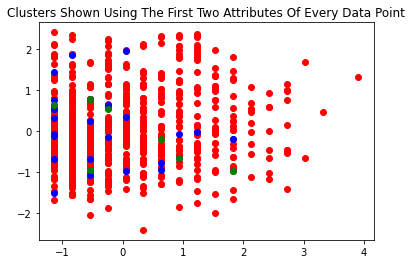

In [28]:
cluster_1 = []
cluster_2 = []
cluster_3 = []
cluster_1_boundary = []
cluster_2_boundary = []
cluster_3_boundary = []
values = []
key_1 = clf.cluster_dictionary_updated.keys()

list_1 = list(key_1)
for i in list_1:
  values.append(i)

for i in clf.cluster_dictionary_updated[values[0]]:
  cluster_1.append(arr_df_1[i])
for j in clf.cluster_dictionary_updated[values[1]]:
  cluster_2.append(arr_df_1[j])
for j in clf.cluster_dictionary_updated[values[2]]:
  cluster_3.append(arr_df_1[j])
for i in clf.boundary_points_of_clusters[values[0]]:
  cluster_1_boundary.append(arr_df_1[i])
for i in clf.boundary_points_of_clusters[values[1]]:
  cluster_2_boundary.append(arr_df_1[i])
for i in clf.boundary_points_of_clusters[values[2]]:
  cluster_3_boundary.append(arr_df_1[i])

plt.title('Clusters Shown Using The First Two Attributes Of Every Data Point')
for i in range(len(cluster_1)):
  plt.scatter(cluster_1[i][0],cluster_1[i][1],color= 'red')
for i in range(len(cluster_2)):
  plt.scatter(cluster_2[i][0],cluster_2[i][1],color= 'blue')
for i in range(len(cluster_3)):
  plt.scatter(cluster_3[i][0],cluster_2[i][1],color= 'green')




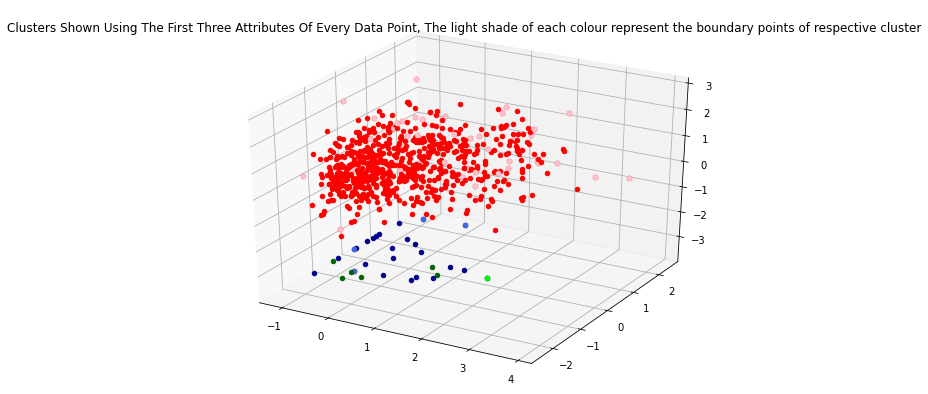

In [24]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
for i in range(len(cluster_1)):
  ax.scatter3D(cluster_1[i][0],cluster_1[i][1],cluster_1[i][2],color= 'red') 
for i in range(len(cluster_2)):
  ax.scatter3D(cluster_2[i][0],cluster_2[i][1],cluster_2[i][2],color= 'darkblue') 
for i in range(len(cluster_3)):
  ax.scatter3D(cluster_3[i][0],cluster_3[i][1],cluster_3[i][2],color= 'darkgreen')
for i in range(len(cluster_1_boundary)):
  ax.scatter3D(cluster_1_boundary[i][0],cluster_1_boundary[i][1],cluster_1_boundary[i][2],color= 'pink')
for i in range(len(cluster_2_boundary)):
  ax.scatter3D(cluster_2_boundary[i][0],cluster_2_boundary[i][1],cluster_2_boundary[i][2],color= 'royalblue') 
for i in range(len(cluster_3_boundary)):
  ax.scatter3D(cluster_3_boundary[i][0],cluster_3_boundary[i][1],cluster_3_boundary[i][2],color= 'lime')
plt.title("Clusters Shown Using The First Three Attributes Of Every Data Point, The light shade of each colour represent the boundary points of respective cluster")
plt.show()
